## **Inserting datafile from drive**

In [53]:
!pip install -U -q PyDrive2
from pydrive2.auth import GoogleAuth
from pydrive2.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [54]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [55]:
downloaded = drive.CreateFile({'id':'1QuoGCmnBKrNwbFSEtyb7efCnU0y3e8Nk'})
downloaded.GetContentFile('Heart Disease.csv')

In [96]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [97]:
import pandas as pd
df=pd.read_csv("Heart Disease.csv")
df.isnull().sum()
# print(df.head(2))

,0
gender,0
age,0
education,105
currentSmoker,0
cigsPerDay,29
BPMeds,53
prevalentStroke,0
prevalentHyp,0
diabetes,0
totChol,50


In [98]:
df.shape

(4240, 16)

In [99]:
#encoding variables
label_encoder = LabelEncoder()
df["gender"] = label_encoder.fit_transform(df["gender"])
df.head(4)

,gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,Heart Disease (in next 10 years)
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1


In [100]:
#Replacing null values
dropping=df.drop('Heart Disease (in next 10 years)', axis=1)

value1=SimpleImputer(missing_values=np.nan, strategy='mean')
value2=pd.DataFrame(value1.fit_transform(dropping), columns=dropping.columns)

value2.shape

(4240, 15)

In [101]:
#Train Test Split
hd = df['Heart Disease (in next 10 years)']

x_train, x_test, y_train, y_test = train_test_split(value2, hd, random_state=0)

print(x_train.shape)
print(x_test.shape)

(3180, 15)
(1060, 15)


In [102]:
#Mini_Max Scaling
scaler_val = MinMaxScaler()

x_train_scaled = scaler_val.fit_transform(x_train)
x_test_scaled = scaler_val.transform(x_test)

In [103]:
#KNN
knn=KNeighborsClassifier()

knn.fit(x_train, y_train)

print("Test set accuracy: {:.2f}".format(knn.score(x_test, y_test)))

#KNN after Scaling
knn.fit(x_train_scaled, y_train)

print("Test set accuracy: {:.2f}".format(knn.score(x_test_scaled, y_test)))

Test set accuracy: 0.83
Test set accuracy: 0.84


In [104]:
scaler = StandardScaler()
scaler.fit(x_train)

x_train_sd = scaler.transform(x_train)
x_test_sd = scaler.transform(x_test)


knn.fit(x_train_sd, y_train)


print("KNN test accuracy: {:.2f}".format(knn.score(x_test_sd, y_test)))

KNN test accuracy: 0.84


In [105]:
#Train
# Logistic Regression
log_model = LogisticRegression(max_iter=5000)
log_model.fit(x_train_scaled, y_train)
y_pred_log = log_model.predict(x_test_scaled)

# Random Forest
raf_model = RandomForestClassifier()
raf_model.fit(x_train_scaled, y_train)
y_pred_raf = raf_model.predict(x_test_scaled)

# KNN
knn_model = KNeighborsClassifier()
knn_model.fit(x_train_scaled, y_train)
y_pred_knn = knn_model.predict(x_test_scaled)

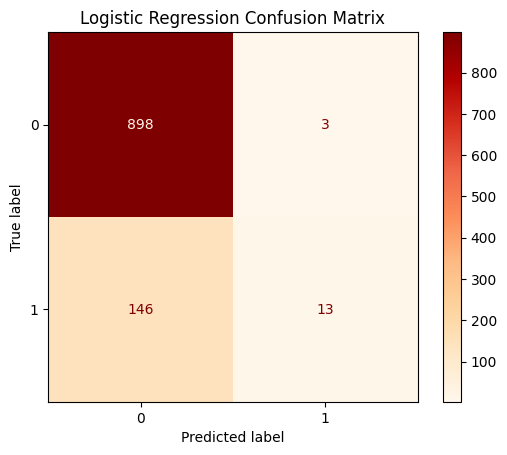

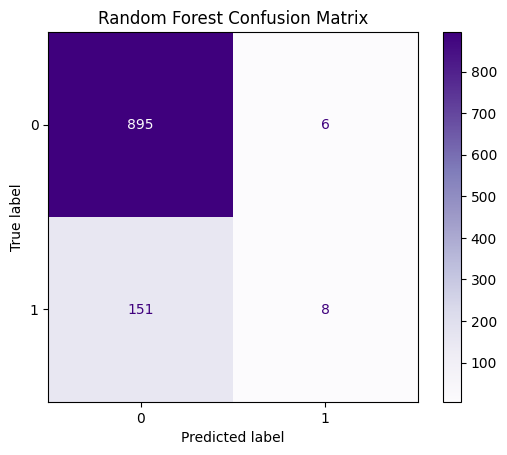

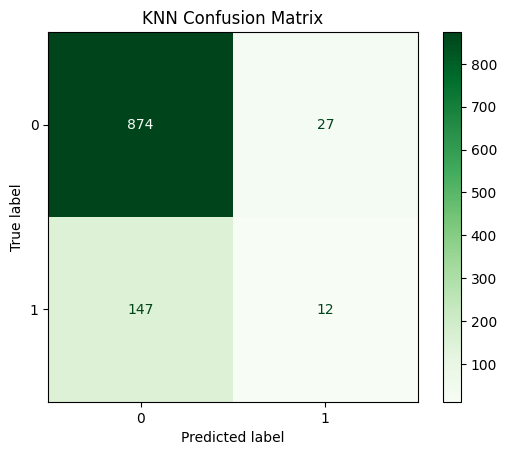

In [106]:
#Confusion Matrix
labels = sorted(hd.unique())
# Logistic Reg
cm_log = confusion_matrix(y_test, y_pred_log)
ConfusionMatrixDisplay(cm_log, display_labels=labels).plot(cmap="OrRd")
plt.title("Logistic Regression Confusion Matrix")
plt.show()

# Random Forest
cm_rf = confusion_matrix(y_test, y_pred_raf)
ConfusionMatrixDisplay(cm_rf, display_labels=labels).plot(cmap="Purples")
plt.title("Random Forest Confusion Matrix")
plt.show()

# KNN
cm_knn = confusion_matrix(y_test, y_pred_knn)
ConfusionMatrixDisplay(cm_knn, display_labels=labels).plot(cmap="Greens")
plt.title("KNN Confusion Matrix")
plt.show()

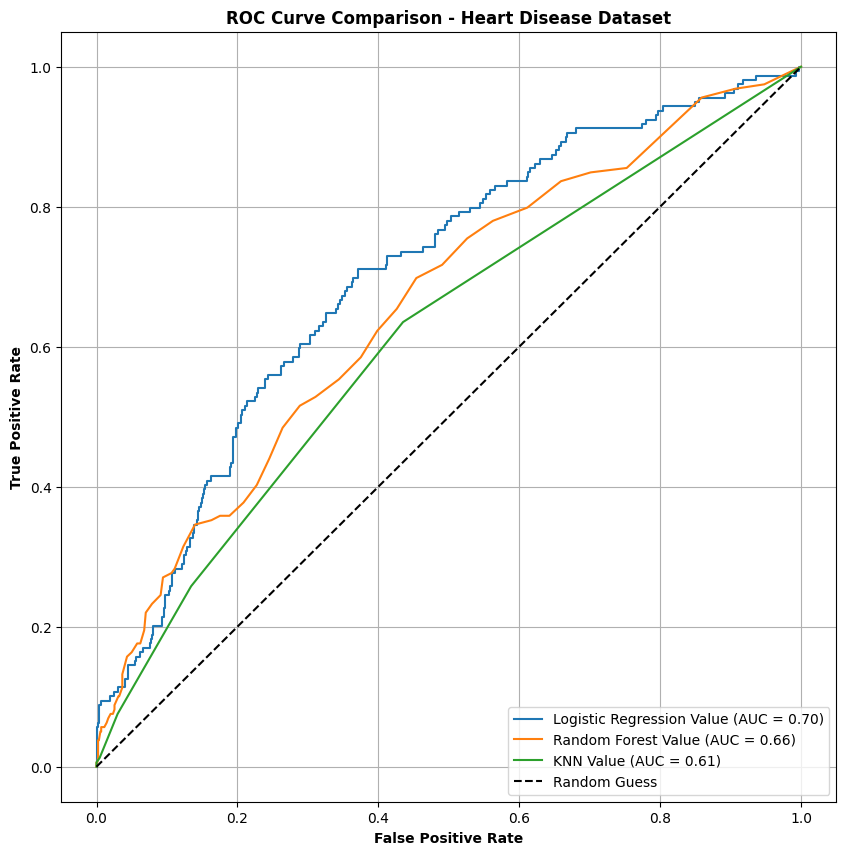

In [110]:
models = {
    "Logistic Regression Value": LogisticRegression(),
    "Random Forest Value": RandomForestClassifier(),
    "KNN Value": KNeighborsClassifier()
}


plt.figure(figsize=(10, 10))

for i,j in models.items():

    j.fit(x_train_scaled, y_train)
    y_probs = j.predict_proba(x_test_scaled)[:, 1]
    # ROC and AUC
    fpr, tpr, _ = roc_curve(y_test, y_probs)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f"{i} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')

plt.xlabel("False Positive Rate",weight="bold")
plt.ylabel("True Positive Rate",weight="bold")
plt.title("ROC Curve Comparison - Heart Disease Dataset",weight="bold")
plt.legend(loc="lower right")
plt.grid()
plt.show()

In [108]:
#Interpretetion

print("1st Part")
print("Accuracy Level:", accuracy_score(y_test, y_pred_log))
print("1st Part Done")
print()

print("2nd Part")
print("Logistic Regression Values:")
print(classification_report(y_test, y_pred_log, target_names=[str(l) for l in labels]))
print("2nd Part Done")
print()

print("3rd Part")
print("Random Forest Values:")
print(classification_report(y_test, y_pred_raf, target_names=[str(l) for l in labels]))
print("3rd Part Done")
print()

print()
print("4th Part")
print("KNN Values:")
print(classification_report(y_test, y_pred_knn, target_names=[str(l) for l in labels]))
print("4th Part Done")

1st Part
Accuracy Level: 0.8594339622641509
1st Part Done

2nd Part
Logistic Regression Values:
              precision    recall  f1-score   support

           0       0.86      1.00      0.92       901
           1       0.81      0.08      0.15       159

    accuracy                           0.86      1060
   macro avg       0.84      0.54      0.54      1060
weighted avg       0.85      0.86      0.81      1060

2nd Part Done

3rd Part
Random Forest Values:
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       901
           1       0.57      0.05      0.09       159

    accuracy                           0.85      1060
   macro avg       0.71      0.52      0.51      1060
weighted avg       0.81      0.85      0.80      1060

3rd Part Done


4th Part
KNN Values:
              precision    recall  f1-score   support

           0       0.86      0.97      0.91       901
           1       0.31      0.08      0.12       159

   